In [23]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
%matplotlib inline

In [24]:
#import the MNIST data set
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
#functions that will assign the amount of training and test data we will load from the data set
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test
    

In [26]:
#functions for resizing and displaying the data
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
        
def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [25]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


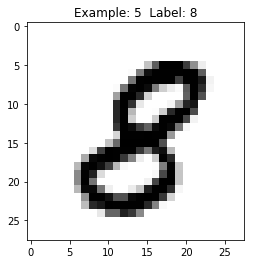

In [7]:
display_digit(5)

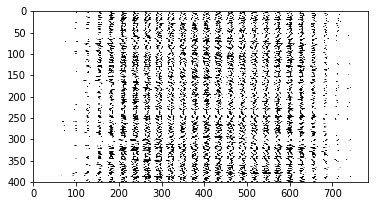

In [27]:
display_mult_flat(0,400)

In [41]:
#definig x placeholder as a variable to feed x_train data into
x = tf.placeholder(tf.float32, shape=[None, 784])
#defining y_ placeholder which will be used to feed y_train into
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [42]:
#defining weights and bias and setting values to zero
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#defining the classifier function
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [43]:
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.05
TRAIN_STEPS = 4000

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


In [44]:
sess = tf.Session()
init = tf.global_variables_initializer()
#init = tf.initialize_all_variables()
sess.run(init)

In [45]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [46]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))
    

Training Step:0  Accuracy =  0.5988  Loss = 2.24448
Training Step:100  Accuracy =  0.8408  Loss = 0.768281
Training Step:200  Accuracy =  0.8645  Loss = 0.58216
Training Step:300  Accuracy =  0.8738  Loss = 0.504894
Training Step:400  Accuracy =  0.8789  Loss = 0.460476
Training Step:500  Accuracy =  0.8827  Loss = 0.430721
Training Step:600  Accuracy =  0.8863  Loss = 0.408929
Training Step:700  Accuracy =  0.8883  Loss = 0.392006
Training Step:800  Accuracy =  0.8905  Loss = 0.378314
Training Step:900  Accuracy =  0.8924  Loss = 0.366895
Training Step:1000  Accuracy =  0.8942  Loss = 0.357144
Training Step:1100  Accuracy =  0.8959  Loss = 0.348665
Training Step:1200  Accuracy =  0.8975  Loss = 0.341181
Training Step:1300  Accuracy =  0.8986  Loss = 0.334493
Training Step:1400  Accuracy =  0.8984  Loss = 0.328455
Training Step:1500  Accuracy =  0.899  Loss = 0.322958
Training Step:1600  Accuracy =  0.8999  Loss = 0.317915
Training Step:1700  Accuracy =  0.9004  Loss = 0.313259
Trainin

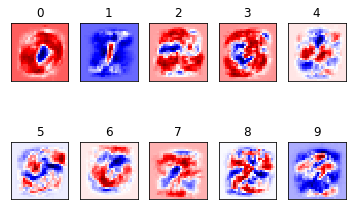

In [47]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

#red represents negative weights, red positive

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


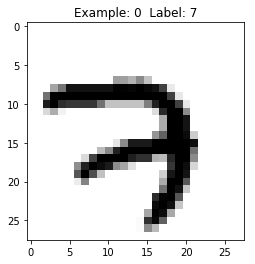

In [48]:
x_train, y_train = TRAIN_SIZE(1) 
display_digit(0)

In [49]:
#matrix of probabilities
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[  3.48642134e-05   1.55208636e-05   9.06272456e-02   1.82698276e-02
    1.14562770e-03   1.83681368e-05   7.08053849e-05   8.48686397e-01
    7.51144765e-03   3.36199366e-02]]


In [50]:
#the position of the highest value in probability matrix
answer.argmax()

7

In [54]:
#function to make preiction on a random digit in data set
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    
    # THIS GETS OUR PREDICATION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax() 
    
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    

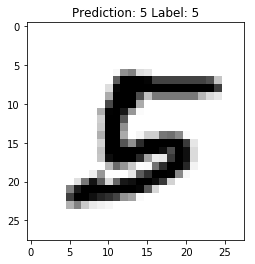

In [53]:
num = ran.randint(0, 55000)
display_compare(num)

# 